# Customer Attrition


##### Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

# Data Overview

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


## Data Cleaning

In [7]:
df['TotalCharges'].isna().sum()

0

In [8]:
df.loc[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
#Replacing spaces with null values in total charges column
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

In [11]:
#Dropping null values from total charges column
todrop = df.loc[df['TotalCharges'].isna()].index
df.drop(todrop, inplace = True)

In [12]:
#Convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [13]:
#replace 'No internet service' to No

replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    df[i]  = df[i].replace({'No internet service' : 'No'})

In [14]:
#replace values from binary
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [15]:
#Separating churn and non churn customers
churn_df     = df[df["Churn"] == "Yes"]
not_churn_df = df[df["Churn"] == "No"]


In [16]:
#Convert target to binary
df.loc[df['Churn'] == 'Yes', 'Churn'] = 1
df.loc[df['Churn'] == 'No', 'Churn'] = 0

In [17]:
df.loc[df['Churn'] == 'No', 'Churn'] = 0

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [18]:
#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

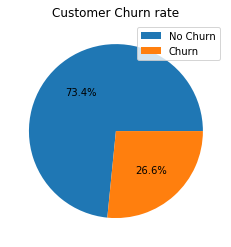

In [19]:
lab = ['No Churn', 'Churn']
val = df['Churn'].value_counts().values.tolist()

fix, ax = plt.subplots()
ax.pie(val, autopct='%1.1f%%')
plt.legend(labels = lab)
plt.title('Customer Churn rate')
plt.show()

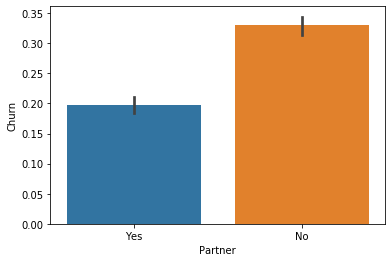

In [20]:
sns.barplot(x=df['Partner'], y=df['Churn'])

In [21]:
def plot_bar(column):
    sns.barplot(x=df[column], y=df['Churn'])
    plt.ylabel('Churn Rate')
    plt.show()


In [22]:
def plot_histogram(column):
    x = churn_df[column]
    y = not_churn_df[column]
    
    plt.hist([x, y], label = ['churn', 'not churn'], density = True)
    plt.legend()
    
    plt.title(str(column + ' churn distribution'))
    
    plt.xlabel(column)
    plt.ylabel('proportion')
    
    plt.show()
    

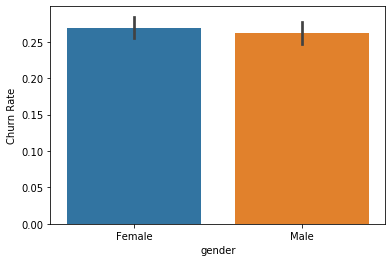

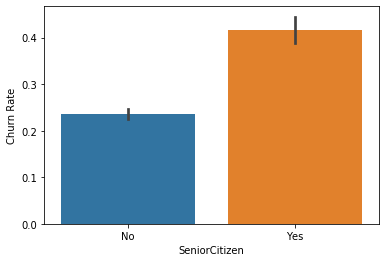

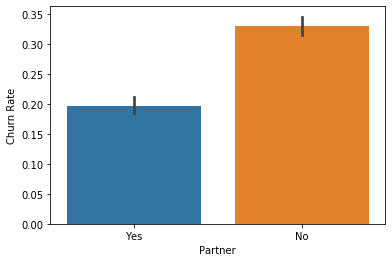

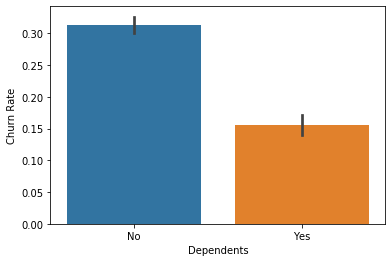

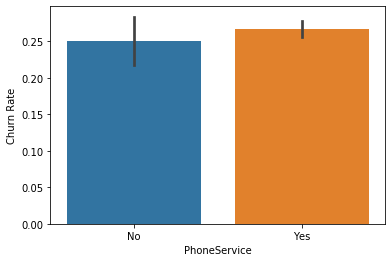

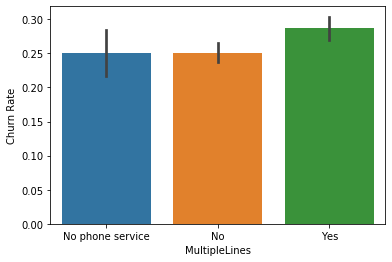

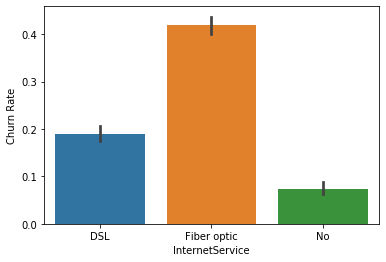

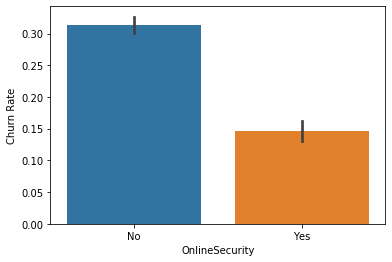

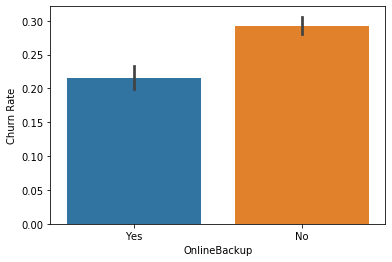

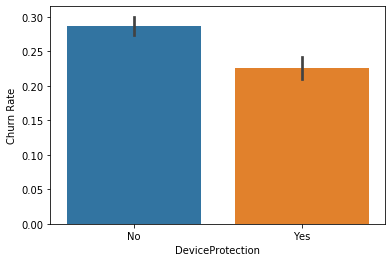

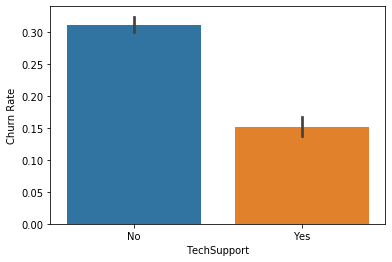

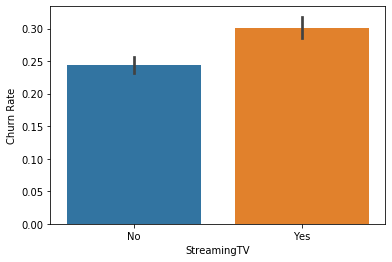

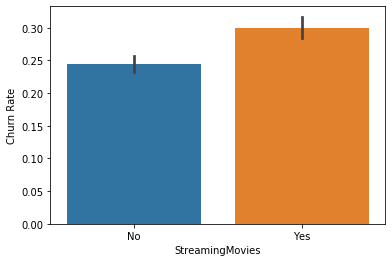

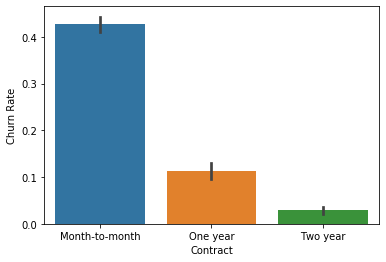

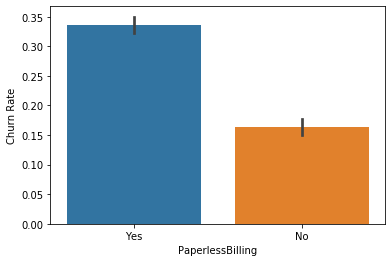

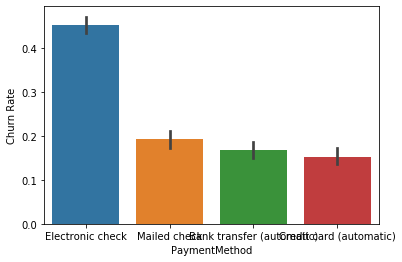

In [23]:
for i in cat_cols:
    plot_bar(i)

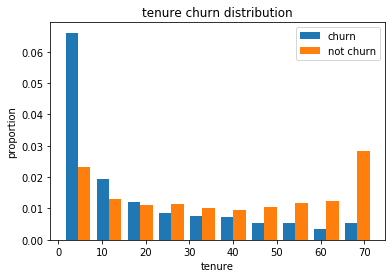

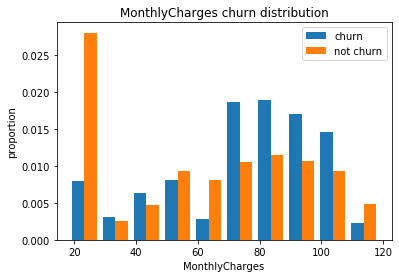

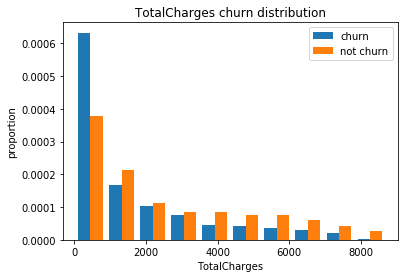

In [24]:
for i in num_cols:
    plot_histogram(i)

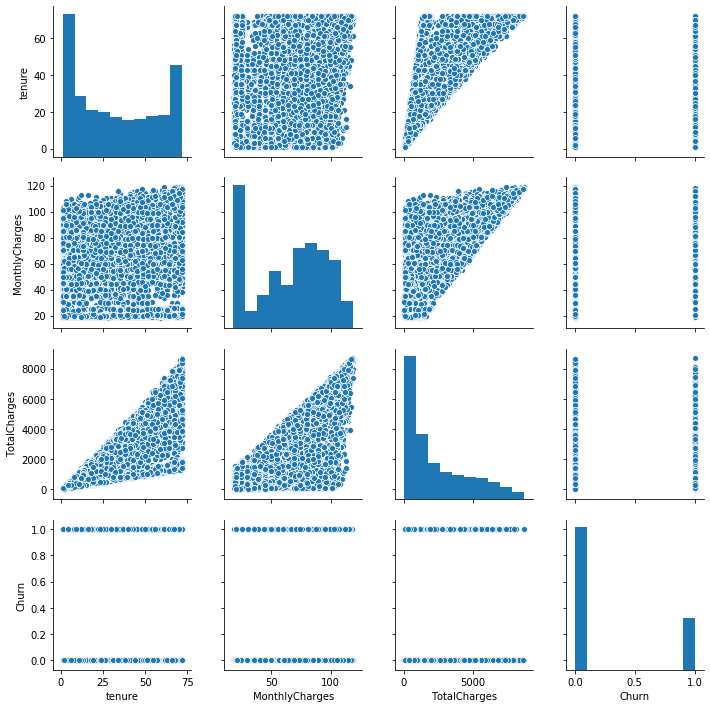

In [25]:
sns.pairplot(data = df)

### Data Preprocessing

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [27]:
#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [28]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
    
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols )

In [29]:
#Scaling Numerical Columns
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled, columns = num_cols)

In [30]:
#Dropping original values and merge scaled values
df_og = df.copy()
df = df.drop(columns = num_cols, axis = 1)
df = df.merge(scaled, left_index = True, right_index = True, how ='left')

In [31]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7021.000000,7021.000000,7021.000000
mean,0.504693,0.162400,0.482509,0.298493,0.903299,0.286547,0.344852,0.343857,0.290102,0.384386,...,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100,0.000538,-0.000271,0.000450
std,0.500014,0.368844,0.499729,0.457629,0.295571,0.452180,0.475354,0.475028,0.453842,0.486484,...,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637,1.000141,0.999997,1.000279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.280248,-1.547283,-0.999069
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.954296,-0.970561,-0.830227
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.139417,0.184544,-0.390473
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.919926,0.832733,0.667141
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.612573,1.793381,2.824261


In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [33]:
# Compute the correlation matrix
corr = df.corr()

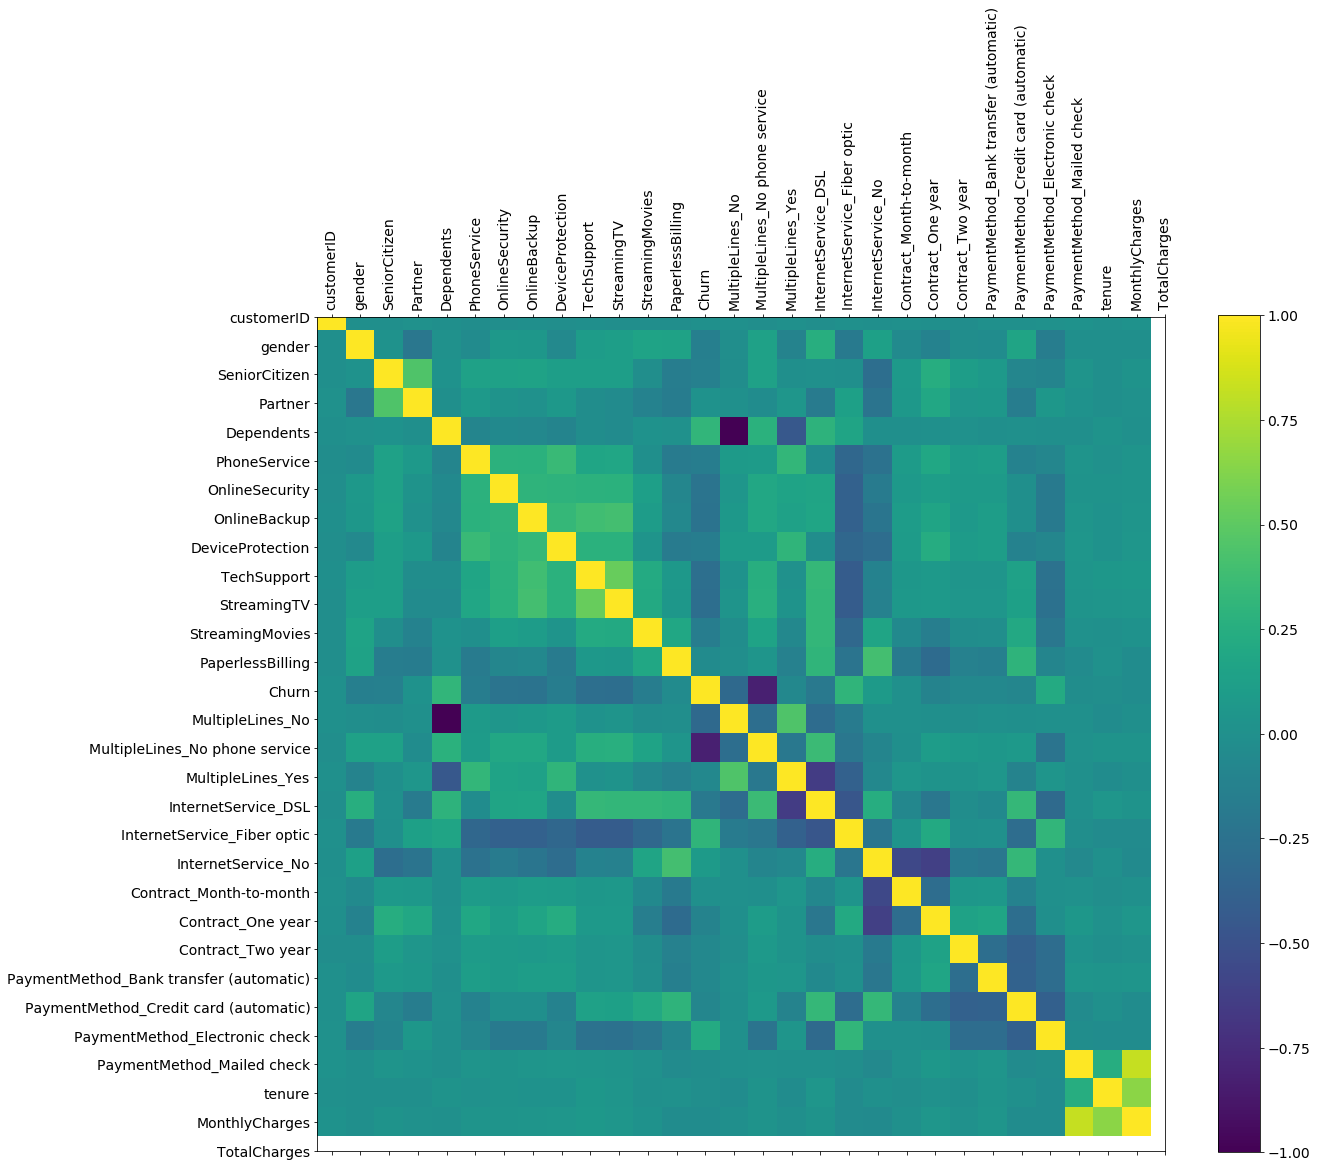

In [34]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14);

### Visualising data with principle componant analysis

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components = 2)

In [37]:
todrop = df.loc[df['TotalCharges'].isna()].index
df.drop(todrop, inplace = True)

In [38]:
X = df[[i for i in df.columns if i not in Id_col + target_col]]
Y = df[target_col + Id_col]

In [39]:
principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components,columns = ["PC1","PC2"])
pca_data = pca_data.merge(Y,left_index=True,right_index=True,how="left")
pca_data["Churn"] = pca_data["Churn"].replace({1:"Churn",0:"Not Churn"})

In [40]:
pca_data

,PC1,PC2,Churn,customerID
0,-1.997706,0.023440,Not Churn,7590-VHVEG
1,-0.249463,-0.797061,Not Churn,5575-GNVDE
2,-1.575538,-0.632498,Churn,3668-QPYBK
3,-0.189113,0.019913,Not Churn,7795-CFOCW
4,-1.311677,-0.512389,Churn,9237-HQITU
...,...,...,...,...
7016,0.036813,-0.210193,Not Churn,1471-GIQKQ
7017,3.051348,-0.252797,Not Churn,4807-IZYOZ
7018,-1.653516,0.371491,Churn,1122-JWTJW
7019,-1.200570,-1.402341,Not Churn,9710-NJERN


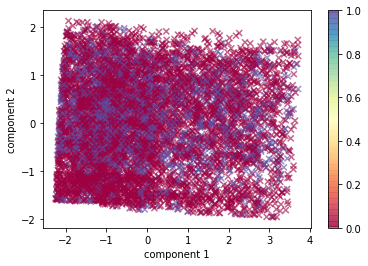

In [41]:
plt.scatter(pca_data['PC1'], pca_data['PC2'],
            c=df['Churn'], edgecolor='none', alpha=0.6, cmap = 'Spectral', marker = 'x' )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.rcParams["figure.figsize"] = (8, 8)


plt.colorbar();

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, plot_confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#splitting train and test data 
train,test = train_test_split(df,test_size = .25 ,random_state = 111)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, plot_confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#splitting train and test data 
train,test = train_test_split(df,test_size = .25 ,random_state = 111)

In [99]:
def telecom_churn_prediction(algorithm, training_x, testing_x, training_y, testing_y, cols, cf, threshold_plot):
    
    #model
    algorithm.fit(training_x, training_y)
    predictions = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    #coefficients
    if cf == 'coefficients':
        coefficients = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == 'features':
        coefficients = pd.DataFrame(algorithm.feature_importanaces_)
    
    column_df = pd.DataFrame(cols)
    coef_sumry = pd.merge(coefficients, column_df, left_index = True, right_index = True, how = 'left')
    
    coef_sumry.columns = ['coefficients', 'features']
    coef_sumry = coef_sumry.sort_values(by = 'coefficients', ascending = False)
    
    print(algorithm)
    print('\n Classification Report : \n', classification_report(testing_y, predictions))
    print('Accuracy Score: ', accuracy_score(testing_y, predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    # roc_auc_score
    model_roc_auc = roc_auc_score(testing_y, predictions)
    print('Area under curve : ', model_roc_auc, '\n')
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:,1])
    
    #plot confusion matrix
    #plot confusion matrix
    class_names = algorithm.classes_

    disp = plot_confusion_matrix(algorithm, testing_x, testing_y,
                                 cmap=plt.cm.Blues,
                                 display_labels = ['Churn', 'Not Churn'],
                                 normalize= 'true')
    print(disp.confusion_matrix)
    plt.title('Confusion Matrix')
    plt.legend(class_names)
    plt.show()
    
    
     #plot roc curve
    plt.scatter(x= fpr, y = tpr)
    plt.xticks(rotation=90)
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    #coefficient importances
    plt.bar(x=coef_sumry['features'], height=coef_sumry['coefficients'])
    plt.xticks(rotation=90)
    plt.title('Feature Importances')

    plt.show()
    

In [101]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y,
                         cols,"coefficients")

TypeError: telecom_churn_prediction() missing 1 required positional argument: 'threshold_plot'